In [1]:
!pip install torchtuples
!pip install pycox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 729.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 679.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 23.3 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=a1a47607687aa47879a50bdeaa50a4f9d634f7ca91c89dcda4371ef6f4c62c49
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

import torch
import torchtuples as tt

from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [3]:
np.random.seed(1234)
_ = torch.manual_seed(123)

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799/brca.csv')

In [7]:
brca_not_scaled = pd.read_csv('/content/drive/My Drive/3799_new/brca_not_scaled.csv')

In [8]:
brca_demo = pd.read_csv('/content/drive/My Drive/3799_new/brca_demo.csv')

In [9]:
demo = brca_demo.iloc[:,2:30]

In [10]:
brca_demo.iloc[:,2:30].describe()

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.139944,1260.448563,58.435403,2.285635,10.495273,2.285635,6.045412,77.731233,368.907507
std,0.347090,1190.548115,13.070034,4.343524,8.364758,4.343524,9.876832,10.743858,375.534207
min,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,20.000000,31.000000
25%,0.000000,464.500000,49.000000,0.000000,3.000000,0.000000,0.000000,70.000000,189.500000
50%,0.000000,860.000000,58.000000,1.000000,9.000000,1.000000,0.000000,75.000000,230.000000
75%,0.000000,1688.000000,67.000000,3.000000,15.000000,3.000000,8.000000,85.000000,421.000000
max,1.000000,8605.000000,90.000000,35.000000,44.000000,35.000000,30.000000,100.000000,2990.000000


In [11]:
brca.shape

(1079, 20315)

In [12]:
brca_not_scaled.shape

(1079, 30925)

In [13]:
######## 整一个没有scale也没有encode的 data frame!!!!!!!!

In [14]:
brca_not_scaled

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,diagnosis_method=tumor resection,age_group=19-30,age_group=31-40,age_group=41-50,age_group=51-60,age_group=61-70,age_group=71-80,age_group=81-90,age_group=91-100,is_tnbc=1
0,0,259.0,70.0,0.0,2.0,0.0,0.0,85.0,500.0,49.1992,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,437.0,59.0,0.0,3.0,0.0,0.0,70.0,500.0,142.2976,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1321.0,56.0,0.0,8.0,0.0,0.0,90.0,500.0,192.8194,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,1463.0,54.0,0.0,2.0,0.0,0.0,75.0,500.0,326.0194,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,434.0,61.0,1.0,11.0,1.0,0.0,90.0,500.0,168.8309,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0,428.0,75.0,2.0,2.0,2.0,10.0,40.0,189.0,766.8849,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1075,0,215.0,43.0,4.0,5.0,4.0,0.0,70.0,200.0,135.0227,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1076,0,562.0,71.0,1.0,3.0,1.0,3.0,60.0,400.0,160.6871,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1077,0,1062.0,48.0,0.0,4.0,0.0,0.0,80.0,103.0,90.7436,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
data = brca_not_scaled

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation, and test sets while maintaining class balance
df_train_val, df_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['status'])
#df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['status'])

# For prediction demo

In [17]:
data = brca

In [18]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train, validation, and test sets while maintaining class balance
df_train_val, df_test = train_test_split(data, test_size=0.2, random_state=42, stratify=data['status'])
df_train, df_val = train_test_split(df_train_val, test_size=0.2, random_state=42, stratify=df_train_val['status'])

In [19]:
from sklearn_pandas import DataFrameMapper
# Get a list of all column names in the DataFrame
all_cols = data.iloc[:,2:].columns.tolist()

# Create a list of tuples for all columns
all_cols_tuples = [(col, None) for col in all_cols]

# Create the DataFrameMapper object with all columns
x_mapper = DataFrameMapper(all_cols_tuples)

In [20]:
x_train = x_mapper.fit_transform(df_train).astype('float32')
x_val = x_mapper.transform(df_val).astype('float32')
x_test = x_mapper.transform(df_test).astype('float32')

In [21]:
# Extract target
get_target = lambda df: (df['time'].values, df['status'].values)
y_train = get_target(df_train)
y_val = get_target(df_val)
y_test=get_target(df_test)
durations_test, events_test = get_target(df_test)
val = x_val, y_val

## 3. Modelling

### Neural net

We create a simple MLP with two hidden layers, ReLU activations, batch norm and dropout.
Here, we just use the `torchtuples.practical.MLPVanilla` net to do this.

Note that we set `out_features` to 1, and that we have not `output_bias`.

In [22]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

In [23]:
model = CoxPH(net, tt.optim.Adam)

In [25]:
num_nodes=[32, 32]
learning_rate = 0.1
epochs = 512
dropout = 0.1
batch_size = 512
callbacks = None
verbose = False
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

In [27]:
# num_nodes=[32, 32], learning_rate = 0.1, epochs = 512, dropout = 0.1, batch_size = 512

## Prediction

In [28]:
_ = model.compute_baseline_hazards()

In [29]:
surv = model.predict_surv_df(x_test)

In [30]:
surv_prob = surv.reset_index()

In [31]:
# Define the durations for 5 years and 10 years
duration_5_years = 1826.25  # 365.25 * 5
duration_10_years = 3652.5  # 365.25 * 10

# Find the closest survival probabilities for 5 years and 10 years
closest_row_5_years = surv_prob[surv_prob['duration'] <= duration_5_years].iloc[-1]
closest_row_10_years = surv_prob[surv_prob['duration'] <= duration_10_years].iloc[-1]

# Extract the survival probabilities for 5 years and 10 years
surv_prob_at_5_years = closest_row_5_years.iloc[1:].values
surv_prob_at_10_years = closest_row_10_years.iloc[1:].values

In [32]:
# Step 3: Identify high-risk and low-risk groups based on survival probabilities
#threshold = 0.5
threshold = np.median(surv_prob_at_5_years)
high_risk_indices = np.where(surv_prob_at_5_years < threshold)[0]
low_risk_indices = np.where(surv_prob_at_5_years >= threshold)[0]

In [33]:
test = df_test.copy()
test = test.iloc[:,2:]
test = test.reset_index(drop=True)
# use it to obtain the orginal values of all feature
test_not_scaled = brca_not_scaled.iloc[df_test.index, :]
test_not_scaled = test_not_scaled.reset_index(drop=True)

In [34]:
low_risk_surv = surv.iloc[:, low_risk_indices]
high_risk_surv = surv.iloc[:, high_risk_indices]

In [35]:
# Set larger font size
plt.rcParams.update({'font.size': 12})

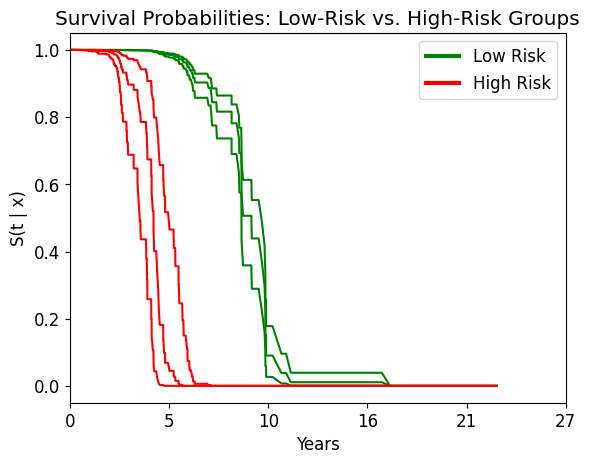

In [67]:
# Plot survival probabilities of the first 5 high-risk and low-risk groups
ax = surv.iloc[:, low_risk_indices[[2,4,5]]].plot(color='green', legend=False)
surv.iloc[:, high_risk_indices[[1,2,5]]].plot(ax=ax, color='red', legend=False)
plt.ylabel('S(t | x)')
plt.xlabel('Years')  # Change xlabel to 'Years'
plt.title('Survival Probabilities: Low-Risk vs. High-Risk Groups') # (First 3)

# Convert x-axis values from days to years
plt.xticks(ticks=ax.get_xticks(), labels=(ax.get_xticks() / 365.25).astype(int))

# Manually create legend with specified colors
legend_labels = ['Low Risk', 'High Risk']
legend_handles = [
    plt.Line2D([0], [0], color='green', linewidth=3),
    plt.Line2D([0], [0], color='red', linewidth=3)
]

plt.legend(legend_handles, legend_labels, loc='best')

plt.xlim(left=-5)  # Set x-axis limit to start from 0

plt.show()

In [68]:
# Plot survival probabilities of the first 5 high-risk and low-risk groups
#ax = surv.iloc[:, low_risk_indices[:3]].plot(color='green', legend=False)
surv.iloc[:, high_risk_indices[2:5]].plot(ax=ax, color='red', legend=False)
#plt.ylabel('S(t | x)')
#plt.xlabel('Years')  # Change xlabel to 'Years'
#plt.title('Survival Probabilities: Low-Risk vs. High-Risk Groups') # (First 3)

# Convert x-axis values from days to years
#plt.xticks(ticks=ax.get_xticks(), labels=(ax.get_xticks() / 365.25).astype(int))

# Manually create legend with specified colors
#legend_labels = ['Low Risk', 'High Risk']
#legend_handles = [
#    plt.Line2D([0], [0], color='green', linewidth=3),
#    plt.Line2D([0], [0], color='red', linewidth=3)
#]
#
#plt.legend(legend_handles, legend_labels, loc='best')

#plt.xlim(left=-5)  # Set x-axis limit to start from 0

#plt.show()

<Axes: title={'center': 'Survival Probabilities: Low-Risk vs. High-Risk Groups'}, xlabel='duration', ylabel='S(t | x)'>

In [38]:
for i in test.columns:
  print(i)

流式输出内容被截断，只能显示最后 5000 行内容。
RSPO4
RSPRY1
RSRC1
RSRC2
RSU1
RTBDN
RTCD1
RTDR1
RTEL1
RTF1
RTKN2
RTKN
RTL1
RTN1
RTN2
RTN3
RTN4IP1
RTN4RL1
RTN4RL2
RTN4R
RTN4
RTP1
RTP2
RTP3
RTP4
RTTN
RUFY1
RUFY2
RUFY3
RUFY4
RUNDC1
RUNDC2A
RUNDC2C
RUNDC3A
RUNDC3B
RUNX1T1
RUNX1
RUNX2
RUNX3
RUSC1
RUSC2
RUVBL1
RUVBL2
RWDD1
RWDD2A
RWDD2B
RWDD3
RWDD4A
RXFP1
RXFP2
RXFP3
RXFP4
RXRA
RXRB
RXRG
RYBP
RYK
RYR1
RYR2
RYR3
S100A10
S100A11
S100A12
S100A13
S100A14
S100A16
S100A1
S100A2
S100A3
S100A4
S100A5
S100A6
S100A7A
S100A7
S100A8
S100A9
S100B
S100G
S100PBP
S100P
S100Z
S1PR1
S1PR2
S1PR3
S1PR4
S1PR5
SAA1
SAA2
SAA3P
SAA4
SAAL1
SAC3D1
SACM1L
SACS
SAE1
SAFB2
SAFB
SAGE1
SAG
SALL1
SALL2
SALL3
SALL4
SAMD10
SAMD11
SAMD12
SAMD13
SAMD14
SAMD1
SAMD3
SAMD4A
SAMD4B
SAMD5
SAMD7
SAMD8
SAMD9L
SAMD9
SAMHD1
SAMM50
SAMSN1
SAP130
SAP18
SAP30BP
SAP30L
SAP30
SAPS1
SAPS2
SAPS3
SAR1A
SAR1B
SARDH
SARM1
SARNP
SARS2
SARS
SART1
SART3
SASH1
SASH3
SASS6
SAT1
SAT2
SATB1
SATB2
SATL1
SAV1
SBDSP1
SBDS
SBF1P1
SBF1
SBF2
SBK1
SBK2
SBNO1
SBNO2
SBSN
SC4MOL
SC5

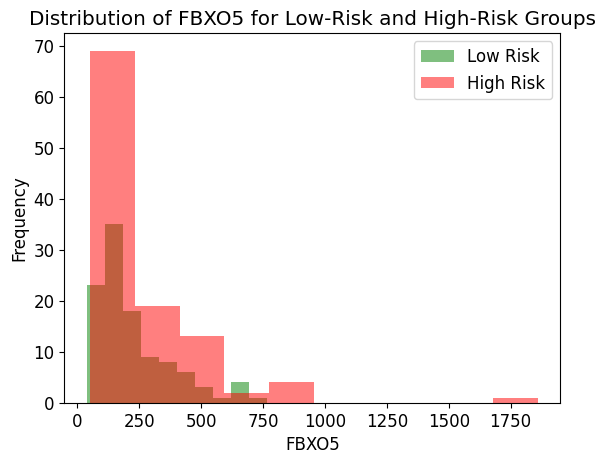

In [39]:
import matplotlib.pyplot as plt

feat = 'FBXO5'

low_risk = test_not_scaled.iloc[low_risk_indices, :][feat]
high_risk = test_not_scaled.iloc[high_risk_indices, :][feat]

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of '+ feat + ' for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

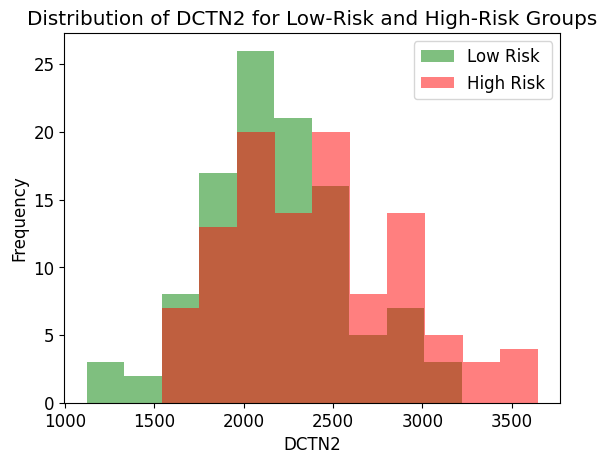

In [40]:
import matplotlib.pyplot as plt

feat = 'DCTN2'

low_risk = test_not_scaled.iloc[low_risk_indices, :][feat]
high_risk = test_not_scaled.iloc[high_risk_indices, :][feat]

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of '+ feat + ' for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

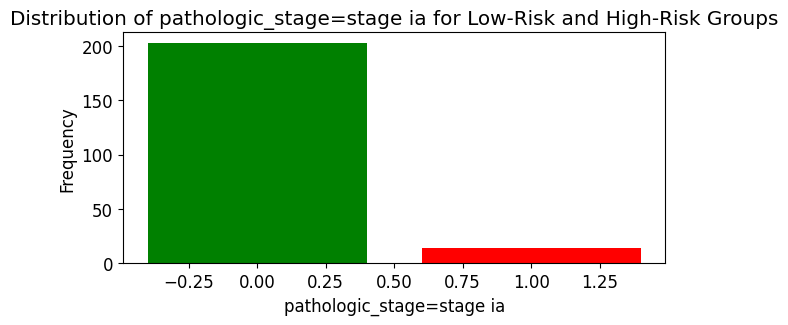

In [41]:
feat = 'pathologic_stage=stage ia'

# Select 'age' column for low-risk and high-risk groups
low_risk = test_not_scaled.loc[low_risk_indices, feat]
high_risk = test_not_scaled.loc[high_risk_indices, feat]

# Get unique categories and their counts
categories = pd.concat([low_risk, high_risk]).value_counts()

# Set the figure size
plt.figure(figsize=(7, 3))

# Plot bar plot for the categories
plt.bar(categories.index, categories.values, color=['green', 'red'])

# Add labels and title
plt.xlabel(feat)
plt.ylabel('Frequency')
plt.title('Distribution of ' + feat + ' for Low-Risk and High-Risk Groups')

# Show plot
plt.show()

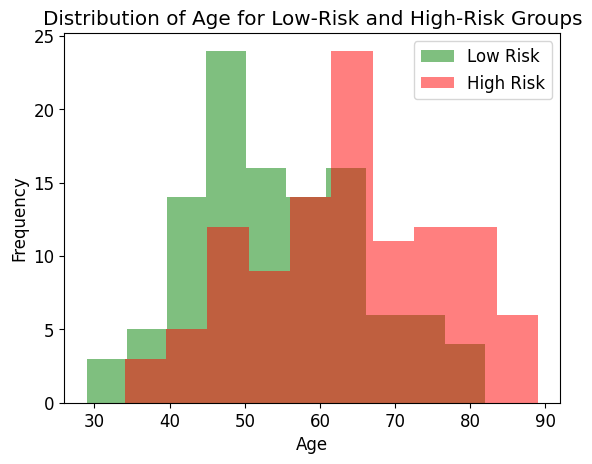

In [42]:
import matplotlib.pyplot as plt

# Select 'age' column for low-risk and high-risk groups
low_risk_age = test_not_scaled.iloc[low_risk_indices, :]['age']
high_risk_age = test_not_scaled.iloc[high_risk_indices, :]['age']

# Plot histograms for low-risk and high-risk groups
plt.hist(low_risk_age, color='green', alpha=0.5, label='Low Risk')
plt.hist(high_risk_age, color='red', alpha=0.5, label='High Risk')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Low-Risk and High-Risk Groups')
plt.legend()

# Show plot
plt.show()

In [71]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

significant_features = []
for feat in test_not_scaled.columns:
    low_risk_values = test_not_scaled.iloc[low_risk_indices][feat]
    high_risk_values = test_not_scaled.iloc[high_risk_indices][feat]

    # Check if the range of the data is zero
    if low_risk_values.max() == low_risk_values.min() or high_risk_values.max() == high_risk_values.min():
        # Skip Shapiro-Wilk test and directly perform Mann-Whitney U test
        t_stat, p_val = mannwhitneyu(low_risk_values, high_risk_values)
    else:
        # Perform Shapiro-Wilk test to check for normality
        _, low_p_val = shapiro(low_risk_values)
        _, high_p_val = shapiro(high_risk_values)

        # Set significance level (alpha)
        alpha = 0.05

        # If both groups are normally distributed, perform t-test
        if low_p_val > alpha and high_p_val > alpha:
            t_stat, p_val = ttest_ind(low_risk_values, high_risk_values)
        else:
            # If either group is not normally distributed, perform Mann-Whitney U test
            t_stat, p_val = mannwhitneyu(low_risk_values, high_risk_values)

    # Check for significance
    if p_val < alpha:
        significant_features.append(feat)

In [72]:
len(significant_features)

4230

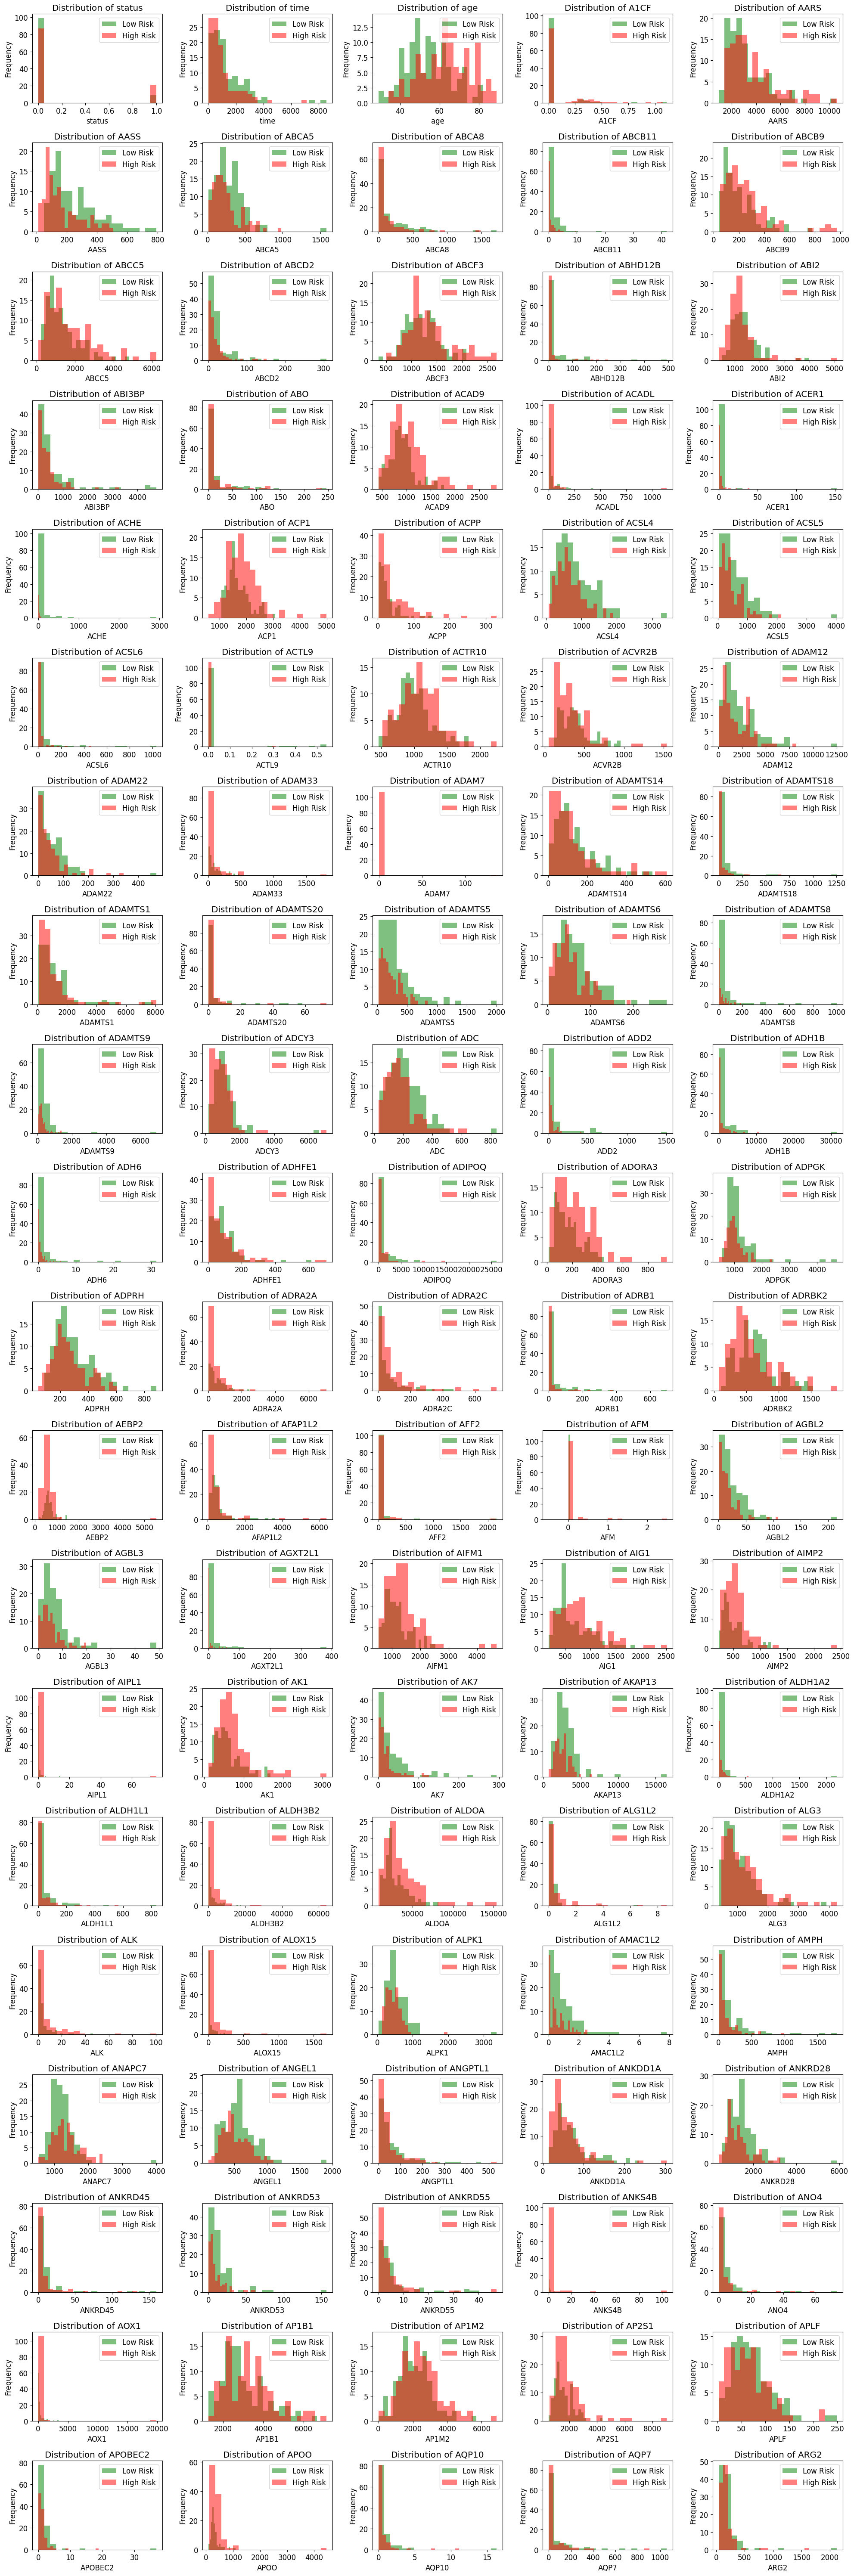

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of rows and columns for the grid layout
n_rows = 1
n_cols = 5

# Calculate the total number of plots needed
total_plots = min(100, len(significant_features))  # Limit to the first 100 features if more exist

# Calculate the number of rows needed based on the total number of plots
n_rows = (total_plots + n_cols - 1) // n_cols

# Create a figure with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))

# Loop through the features and plot each feature in the grid
for idx, feat in enumerate(significant_features[:total_plots]):
    row = idx // n_cols
    col = idx % n_cols

    # Get the appropriate subplot
    ax = axes[row, col]

    # Get data for low-risk and high-risk groups
    low_risk = test_not_scaled.iloc[low_risk_indices][feat].values
    high_risk = test_not_scaled.iloc[high_risk_indices][feat].values

    # Plot histograms for low-risk and high-risk groups
    ax.hist(low_risk, bins=20, color='green', alpha=0.5, label='Low Risk')
    ax.hist(high_risk, bins=20, color='red', alpha=0.5, label='High Risk')

    # Add labels and title
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feat}')
    ax.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()